# Project Business Statistics: E-news Express by Meng Zhang

**Marks: 60**

## Define Problem Statement and Objectives

#### Business statement
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at the E-news Express has the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well in terms of the outline and recommended content to keep customers engaged long enough to make a decision to subscribe.



#### Objective
The design team of the company has researched and created a new landing page that has a new outline and more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly select 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportions of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for different language users?


## Import all the necessary libraries

In [1]:
# Import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy
print(scipy.__version__)
import scipy.stats as stats

1.11.4


## Reading the Data into a DataFrame

In [2]:
# Reading in data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Business Statistics/Project/abtest.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
# View the first few rows in data
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


The dataset contains the following columns: user_id, group, landing page, time spent on the page, converted, language preferred.

In [4]:
# View the last few rows in data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
# Check the shape of the dataset
df.shape

(100, 6)

The data contains 100 rows and 6 columns.

In [6]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


The data contains one integer type column, one float type column, and four categorical columns.

In [7]:
# Check the statistical summary of the data
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


The mean time spent on the page for 100 users is 5.38 minutes. The minimum and maximum time spent on the page is 0.20 minute and 10.71 minutes, respectively.

In [8]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There is no missing value in the data.

In [9]:
# Check for duplicate values
df.nunique()

user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

There are no duplicate values in user_id. There are two categories for group, landing_page, and converted. There are three categories for language_preferred, and 94 unique values in time_spent_on_the_page.

### Univariate Analysis

In [10]:
# Check for group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

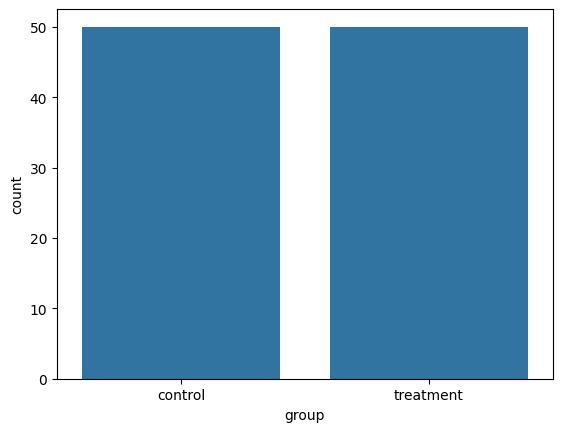

In [11]:
sns.countplot(data=df, x='group');

The control and treatment group both have 50 samples.

In [12]:
# Check for landing_page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

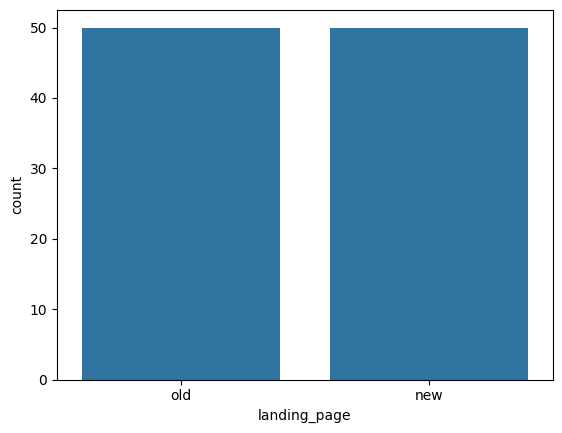

In [13]:
sns.countplot(data=df, x='landing_page');

The old and new landing pages both have 50 data samples in each category.

In [14]:
# Check for time_spent_on_the_page
df['time_spent_on_the_page'].value_counts()

6.04    2
4.75    2
7.16    2
3.88    2
5.86    2
       ..
3.52    1
5.41    1
4.28    1
7.81    1
6.20    1
Name: time_spent_on_the_page, Length: 94, dtype: int64

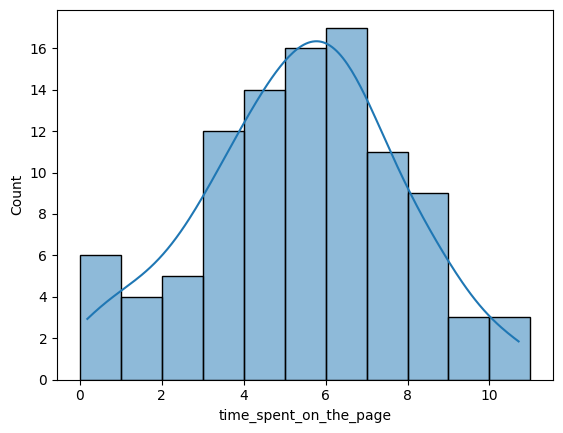

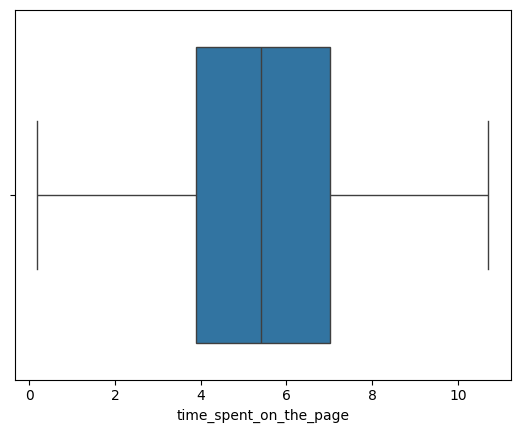

In [15]:
sns.histplot(data=df, x='time_spent_on_the_page', kde=True, bins=np.arange(0,12,1))
plt.show()
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show();

- The time spent on the page of all the data samples follows a normal distribution.
- The lower and upper quartiles of time spent on the page are approximately 4 minutes and 7 minutes, respectively. The median time spent on the page is approximately 5.5 minutes.


In [16]:
# Check for converted
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

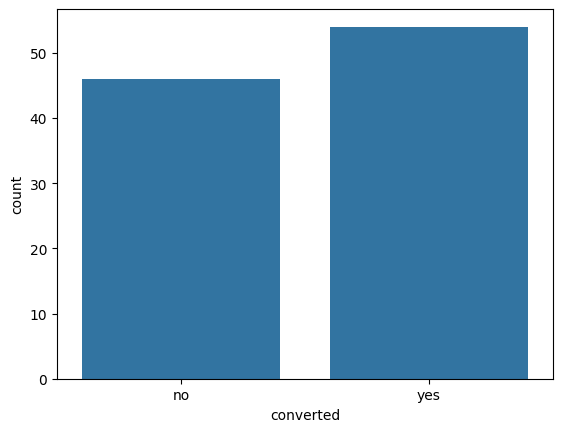

In [17]:
sns.countplot(data=df, x='converted');

There are 54 users in the sample data who were converted, and 46 users were not converted.

In [18]:
# Check for language_preferred
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

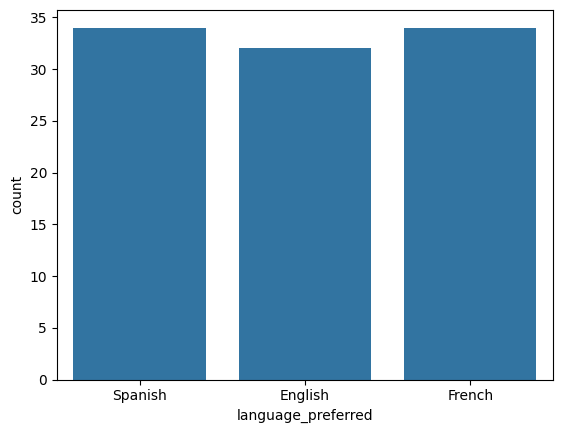

In [19]:
sns.countplot(data=df, x='language_preferred');

- 34 users choose Spanish as their preferred languages. Another 34 users choose French as theirh preferred languages, and 32 users choose English as their preferred languages.

### Bivariate Analysis

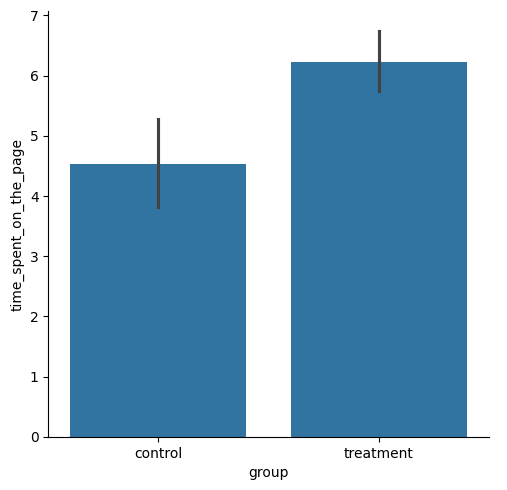

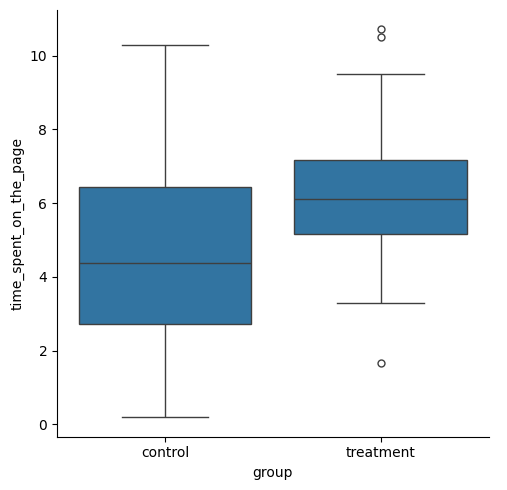

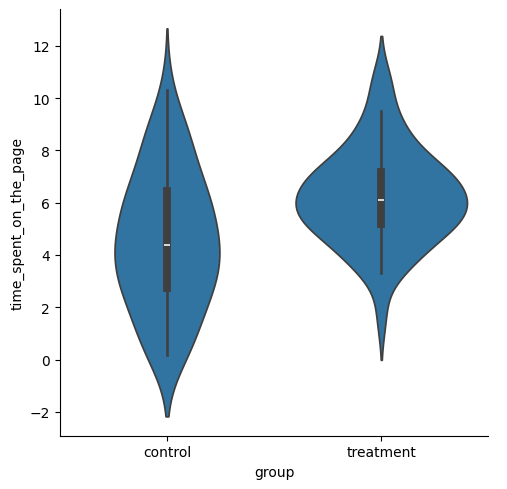

In [20]:
# Check for time_spent_on_the_page VS group
sns.catplot(data=df, x='group', y='time_spent_on_the_page', kind='bar')
plt.show()
sns.catplot(data=df, x='group', y='time_spent_on_the_page', kind='box')
plt.show()
sns.catplot(data=df, x='group', y='time_spent_on_the_page', kind='violin')
plt.show();

- The mean, median, lower and upper quartiles of time spent on the page in the treatment group are longer than the control group.
- There are three outliers in the time spent on the page in the treatment group. The maximum time spent on the page for the treatment group is shorter than the control group, while the minimum time spent on the page for the treatment group is longer than control group.
- The time spent on the page follows the normal distribution in both control and treatment groups.
- The range of time spent on the page (difference between the maximum and minimum time spent on the page) for the control group is larger than the treatment group.

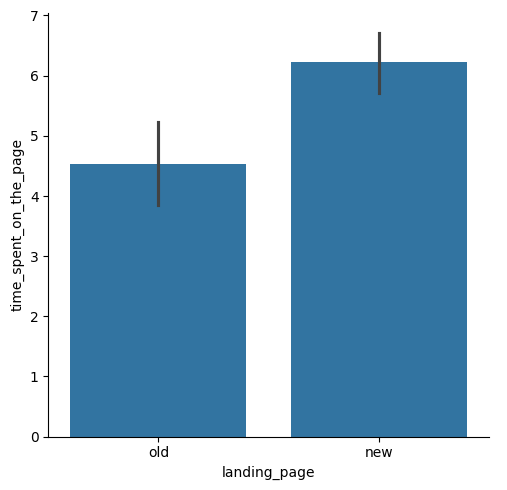

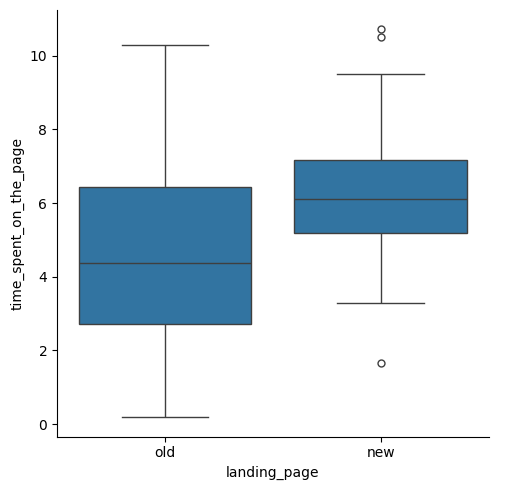

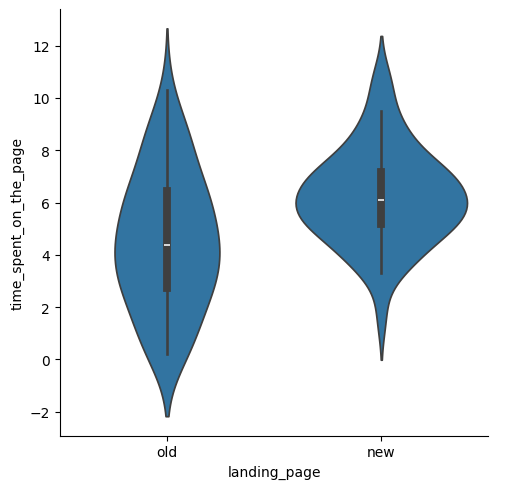

In [21]:
# Check for time_spent_on_the_page VS landing_page
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', kind='bar')
plt.show()
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', kind='box')
plt.show()
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', kind='violin')
plt.show();

- The mean, median, lower and upper quartiles of time spent on the new page are longer than the old page.
- There are three outliers in the time spent on the new page. The maximum time spent on the new page is shorter than the old page, while the minimum time spent on the new page is longer than the old page.
- The time spent on the both new and old pages follows the normal distributions.
- The range of time spent on the page (difference between the maximum and minimum time spent on the page) for the old page is larger than the new page.

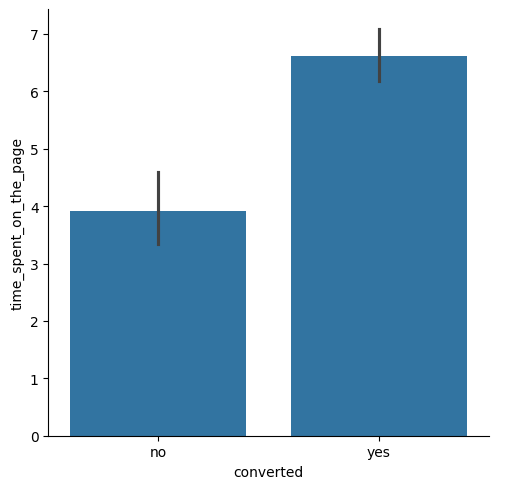

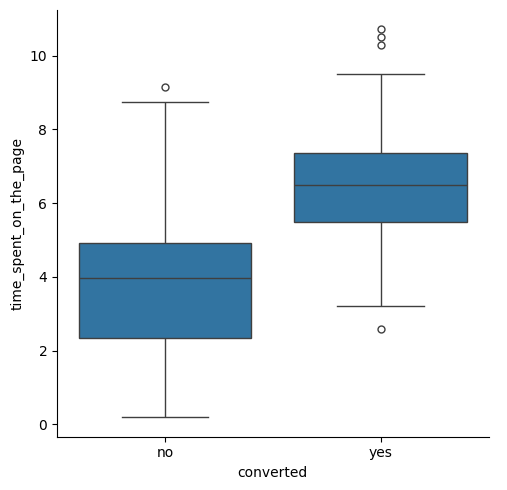

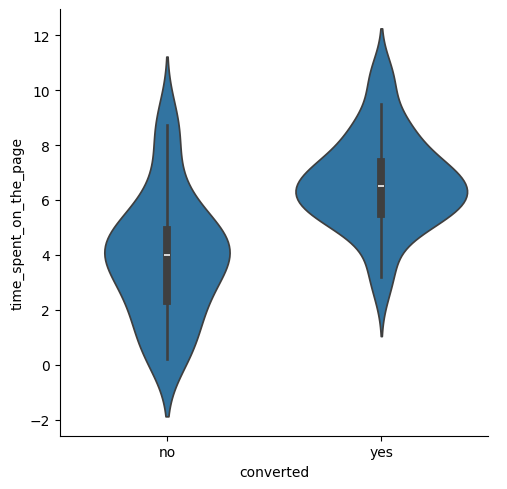

In [22]:
# Check for time_spent_on_the_page VS converted
sns.catplot(data=df, x='converted', y='time_spent_on_the_page', kind='bar')
plt.show()
sns.catplot(data=df, x='converted', y='time_spent_on_the_page', kind='box')
plt.show()
sns.catplot(data=df, x='converted', y='time_spent_on_the_page', kind='violin')
plt.show();

- The converted users spent more mean, median, lower and upper quartile time on the page than users who were not converted.
- The converted users spent longer maximum and minimum time on the page than users who were not converted.
- There is one outlier for non-converted users, and there are four outliers for converted user samples.
- The time spent on the page for non-converted users is left-skewed. The time spent on the page for converted users generally follows a normal distribution.


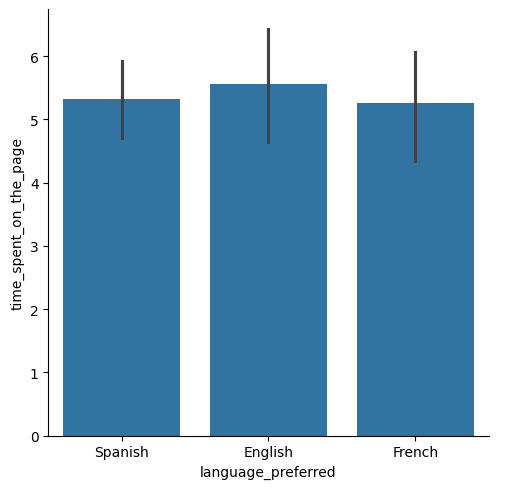

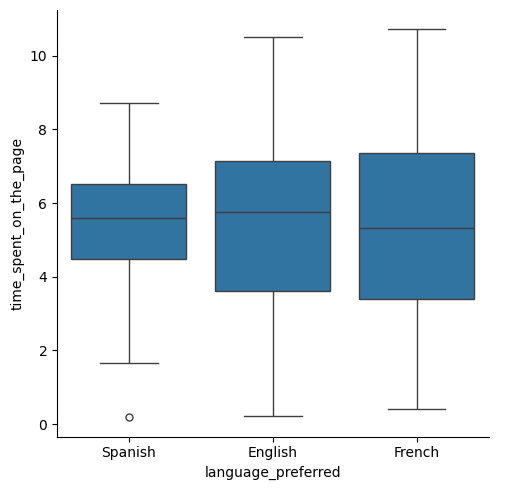

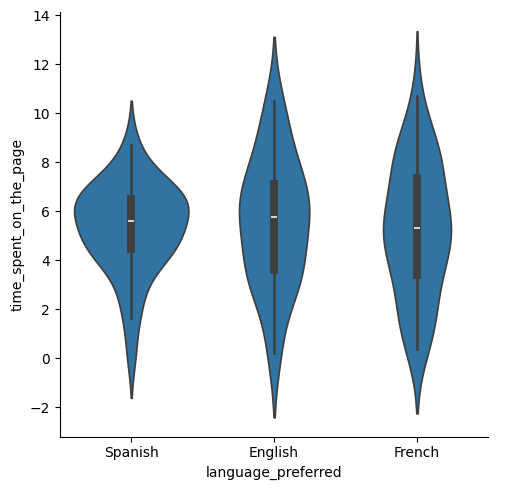

In [23]:
# Check for time_spent_on_the_page VS language_preferred
sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', kind='bar')
plt.show()
sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', kind='box')
plt.show()
sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', kind='violin')
plt.show();

- The users preferred English as their language spent the longest mean and median time on the page, while the useres preferred French as their language spent the shortest mean and median time on the page.
- The difference between maximum and minimum time spent on the page and the inner quartile of the time spent on the page are shortest for users preferred Spanish.
- The inner quartile of time spent on the page is longest for users preferred French.
- The time spent on the page for users preferred Spanish is skewed towards right, whereas the time spent on the page for users preferred English and French generally follows the normal distribution.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

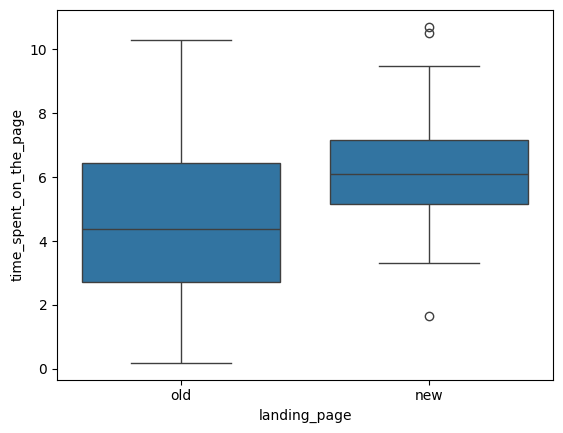

In [24]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');

### Step 1: Define the null and alternate hypotheses

$H_0$: The users spent equal or less time on the new landing page than the exisiting landing page.

$H_a$: The users spent more time on the new landing page than the existing landing page.

### Step 2: Select Appropriate test

This is a one-tailed test for the significance of mean values between two independent samples. As the population standard deviation is unknown, we will perform a two independent sample t-test for the means.

### Step 3: Decide the significance level

Select 0.05 significance level.

In [25]:
alpha = 0.05

### Step 4: Collect and prepare data

In [26]:
# Get the time spent on the new landing page
new_time = df[df['landing_page']=='new']['time_spent_on_the_page']

# Get the time spent on the existing landing page
old_time = df[df['landing_page']=='old']['time_spent_on_the_page']
new_time.shape,old_time.shape

((50,), (50,))

In [27]:
print('The mean time spent on the new landing page is:', np.round(new_time.mean(),5))
print('The mean time spent on the old landing page is:', np.round(old_time.mean(),5))
print('The standard deviation of time spent on the new landing page is:', np.round(new_time.std(),5))
print('The standard deviation of time spent on the old landing page is:', np.round(old_time.std(),5))

The mean time spent on the new landing page is: 6.2232
The mean time spent on the old landing page is: 4.5324
The standard deviation of time spent on the new landing page is: 1.81703
The standard deviation of time spent on the old landing page is: 2.58197


### Step 5: Calculate the p-value

In [28]:
# import necessary libriary
from scipy.stats import ttest_ind

# find the p-value
test_status, p_value = ttest_ind(new_time, old_time, equal_var=False, alternative='greater')
p_value

0.0001392381225166549

### Step 6: Compare the p-value with $\alpha$

In [29]:
if p_value < alpha:
  print('The p-value is', np.round(p_value,5),'and it is smaller than 0.05 significance level.')
else:
  print('The p-value is', np.round(p_value,5),'and it is equal or greater than 0.05 significance level.')

The p-value is 0.00014 and it is smaller than 0.05 significance level.


### Step 7:  Draw inference

As the p_value is substantially lower than the 0.05 significance level, we have enough evidence to reject the null hypothrese. Therefore, the users tend to spend more time on the new landing page than the existing landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

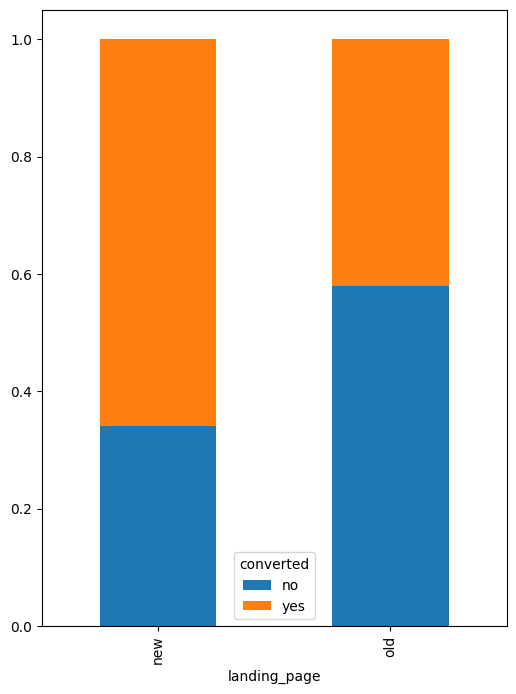

In [30]:
# Visualize data
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True);

- There are more converted users for the new landing page than the old landing page.

In [31]:
# Get the number of converted users for new landing page.
num_converted_new = df[df['converted'] == 'yes']['landing_page'].value_counts()['new']
num_converted_old = df[df['converted'] == 'yes']['landing_page'].value_counts()['old']
print('The number of converted users for new landing page is:', num_converted_new)
print('The number of converted users for existing landing page is:', num_converted_old)

# Get the number of non-converted users for existing landing page.
num_nonconverted_new = df[df['converted'] == 'no']['landing_page'].value_counts()['new']
num_nonconverted_old = df[df['converted'] == 'no']['landing_page'].value_counts()['old']
print('The number of non-converted users for new landing page is:', num_nonconverted_new)
print('The number of non-converted users for existing landing page is:', num_nonconverted_old)

The number of converted users for new landing page is: 33
The number of converted users for existing landing page is: 21
The number of non-converted users for new landing page is: 17
The number of non-converted users for existing landing page is: 29


#### Define the null hypothesis and alternative hypothesis


$H_0$: The conversion rate for the new page is the same as the conversion rate for the existing page.

$H_a$: The conversion rate for the new page is greater than the conversion rate for the existing page.

#### Select the hypothesis test


- It is a binomially distributed population.
- The samples are randomly selected.
- The binomial distribution can be assumed to a normal distribution, as

  $np_1$ = 50 * 33 / 50 = 33 $\geq$ 10

  $n(1-p_1)$ = 50 * 17 / 50 = 17 $\geq$ 10

  $np_2$ = 50 * 21 / 50 = 21 $\geq$ 10

  $n(1-p_2)$ = 50 * 29 / 50 = 29 $\geq$ 10

- We use two proportion Z-test.

#### Define the significance level

In [32]:
alpha = 0.05

#### Prepare data

In [33]:
# Get the number of users for new and existing landing pages.
num_new = df[df['landing_page'] == 'new']['user_id'].nunique()
num_old = df[df['landing_page'] == 'old']['user_id'].nunique()
print('The number of total users for new landing page is:', num_new)
print('The number of total users for existing landing page is:', num_old)

The number of total users for new landing page is: 50
The number of total users for existing landing page is: 50


In [34]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# calculate the p value
test_stat, p_value = proportions_ztest([num_converted_new, num_converted_old],[num_new, num_old], alternative='larger')
test_stat, p_value

(2.4077170617153842, 0.008026308204056278)

#### Compare p_value to the significance level

In [35]:
if p_value < alpha:
  print('The p-value is', np.round(p_value,5),'and it is smaller than 0.05 significance level.')
else:
  print('The p-value is', np.round(p_value,5),'and it is equal or greater than 0.05 significance level.')

The p-value is 0.00803 and it is smaller than 0.05 significance level.


#### Inference

- The p value is lower than the 0.05 significance level. We have enough evidence to reject the null hypothesis. Therefore, the conversion rate for the new page is greater than the existing page.

## 3. Is the conversion and preferred language are independent or related?

#### Create a contingency table to tabulate the frequencies of the two categorical variables

In [36]:
pd.crosstab(df['converted'], df['language_preferred'], margins=True)

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


- There are 100 users in the data sample.
- In the user group that preferred English, 21 users were converted while 11 users were not converted.
- In the user group that preferred French, 15 users were converted while 19 users were not converted.
- In the user group that preferred Spanish, 18 users were converted while 16 users were not converted.

#### Visualize the data

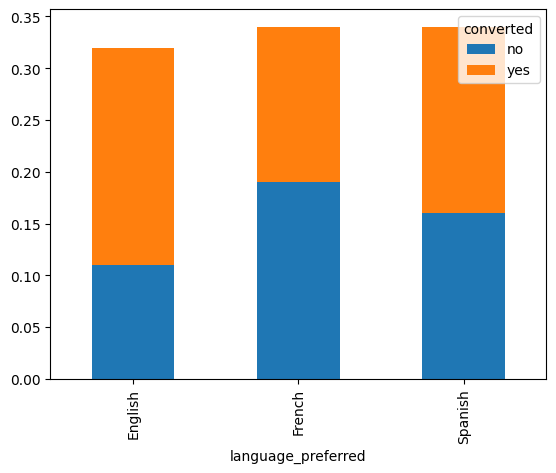

In [37]:
pd.crosstab(df['language_preferred'],df['converted'],normalize=True).plot(kind='bar',stacked=True);

- The users that preferred English have higher conversion rate than the other two groups.

#### Define the null and alternative hypothesis


$H_0$: The conversion and preferred language are independent of each other.

$H_a$: The conversion and preferred language are dependent on each other.

#### Select appropriate significance test



We use the chi-square test for independence to test the dependence between two categorical variables.

#### Select the significance level

In [38]:
alpha = 0.05

#### Prepare data

In [39]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


#### Calculate p_value

In [40]:
# import test function
from scipy.stats import chi2_contingency

# calculate the p_value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

0.2129888748754345

#### Compare the p_value with significance level


In [41]:
if p_value < alpha:
  print('The p-value is', np.round(p_value,5),'and it is smaller than 0.05 significance level.')
else:
  print('The p-value is', np.round(p_value,5),'and it is equal or greater than 0.05 significance level.')

The p-value is 0.21299 and it is equal or greater than 0.05 significance level.


#### Inference

The p value is larger than the 0.05 significance level. We fail to reject the null hypothesis. Therefore, we do not have enough evidence to reject the null hypothesis. The conversion and the preferred language are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

#### Visualize data

In [42]:
df_new = df[df['landing_page']=='new']
df_new['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

- Among all the users used the new landing page, 17 users preferred Spanish, 17 users preferred French, and 16 users preferred English.

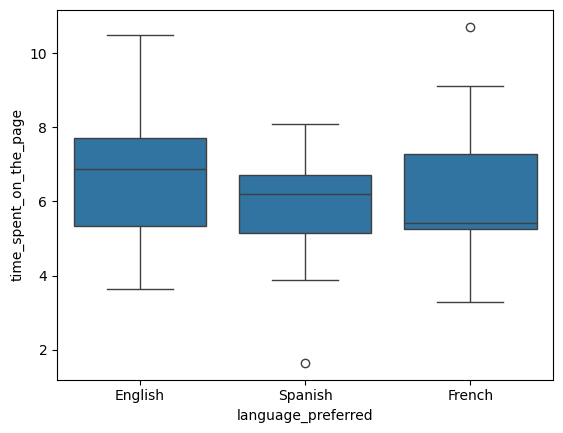

In [43]:
# Visualize the data
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page');

- The upper quartile and median time spent on the new page is longest for users preferred English than the rest.
- There is one outlier value for users preferred Spanish and French, respectively.
- The median time spent on the new page is shortest for users preferred French.
- The distribution of time spent on the new page is right-skewed for users preferred English and Spanish. The distribution of time spent on the new page is left-skewed for users preferred French.

#### Define null and alternative hypothesis

$H_0$: The time spent on the new page are the same for three different language users.

  $\mu_1$ = $\mu_2$ = $\mu_3$

$H_a$: The time spent on the new page for at least one language users is different from the rest language users.

#### Select appropriate significance test

- Use one-way ANOVA test. However, we need to first check the normality and equality of variance in the sample data.

Shapiro-Wilk's test for normality

We will test the following hypothesis

$H_0$: The time spent on the new page follows a normal distribution.

$H_a$: The time spent on the new page does not follow a normal distribution.

In [44]:
# Calculate the p value based on the significance level of 0.05.
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
w, p_value

(0.9857664704322815, 0.8040016293525696)

- The p value is 0.80, which is larger than the significance level of 0.05. We fail to reject the null hypothesis. Therefore, the time spent on the new page follows a normal distribution.

Levene's test for equality of variance


We will test the following hypothesis

$H_0$: All population variances are equal.

$H_a$: At least one population variance is different from the rest.

In [45]:
# Calculate the p value based on the significance level of 0.05.
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'])
p_value

0.46711357711340173

- The p value is 0.47, which is larger than the significance level of 0.05. We fail to reject the null hypothesis. Therefore, All population variances are equal.

#### Select the significance level for the one-way ANOVA test

In [46]:
alpha = 0.05

#### Prepare data

In [47]:
df_new_en = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
df_new_sp = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
df_new_fr = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

#### Calculate p value

In [48]:
from scipy.stats import f_oneway

# Calculate p value
test_stat, p_value = f_oneway(df_new_en, df_new_sp, df_new_fr)
p_value

0.43204138694325955

#### Compare p value with significance level

In [49]:
if p_value < alpha:
  print('The p-value is', np.round(p_value,5),'and it is smaller than 0.05 significance level.')
else:
  print('The p-value is', np.round(p_value,5),'and it is equal or greater than 0.05 significance level.')

The p-value is 0.43204 and it is equal or greater than 0.05 significance level.


#### Inference

Since the p value is larger than the 0.05 significance level, we fail to reject the null hypothesis. Therefore, we do not have enough evidence to reject the null hypothesis, which means the time spent on the new page is same for different language users.

## Conclusion and Business Recommendations

- There are 100 users in the sample data. Half of the users used the existing landing page and the other half of the users used the new landing page.

- The time spent on the landing page for all users generally follows a normal distribution.

- We found that users tend to spend more time on the new landing page compared to the existing landing page. This conclusion has been proved to be valid at the 5% significance level.

- The significance test also suggests that the conversion rate using the new landing page is higher than the existing landing page.

- We found that the conversion and the preferred language are independent of each other.

- Although the users who preferred English spent the longest median time on the new landing page than the rest language users and users who preferred French spent the shortest median time on the new landing page in the visual analysis, we found that the mean time spent on the new landing page is not different for users who prefferred different languages at the 5% significance level.

- With the statistical analysis shown above, we have evidence to prove that the newly designed landing page will be effective to gather new subscribers. This action can be an effective approach to address the decline in new monthly subscribers compared to the past year. Following this guidance, the design of the landing page is important for e-news users. Therefore, further improving the landing page design could additionally attract more new subscribers in the future.

In [50]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Business Statistics/Project/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Business Statistics/Project/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb to html
[NbConvertApp] Writing 1221839 bytes to /content/drive/MyDrive/Colab Notebooks/Business Statistics/Project/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.html


___